

# Kaggle project 2


## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
np.set_printoptions(precision=3, suppress=True)

ModuleNotFoundError: No module named 'tensorflow_datasets'

##  Creation of Data Frame


In [ ]:
nba = pd.read_csv('/kaggle/input/nbawest/WestWins.csv')
data = pd.DataFrame(nba)
display(data)

,Team,Wins,Losses,Pct
0,Celtics,43,12,0.782
1,Cavaliers,36,17,0.679
2,Bucks,35,21,0.625
3,Knicks,33,22,0.600
4,76ers,32,22,0.593
5,Pacers,31,25,0.554
6,Heat,30,25,0.545
7,Magic,30,25,0.545
8,Bulls,26,29,0.473
9,Hawks,24,31,0.436


In [ ]:
print(data.isnull().sum())

Team      0
Wins      0
Losses    0
Pct       0
dtype: int64


In [ ]:
x = data.iloc[:,1:3]

In [ ]:
y = data.iloc[:,2:3]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/4, random_state=0)
#In [10]:
x_train
y_train
    
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)
    

[[-1.572  1.435]
 [ 0.629 -0.455]
 [-0.786  0.805]
 [ 0.786 -1.085]
 [-0.157  0.175]
 [-1.101  1.12 ]
 [ 0.314 -0.297]
 [ 1.887 -1.872]
 [ 0.     0.175]]


In [ ]:
print(x_test)

[[ 0.525 -0.443]
 [-1.4    1.385]
 [ 0.875 -0.942]]


In [ ]:
print(y_train)

    Losses
10      33
2       21
8       29
1       17
7       25
9       31
3       22
0       12
5       25


In [ ]:
print(y_test)

    Losses
6       25
11      36
4       22


In [ ]:


import altair as alt
bars = alt.Chart(data).mark_bar().encode(
    x='Team:N',
    y='Wins:Q',
    color='Team:N'
).properties(height=400, width=800)
bars


alt.Chart(...)

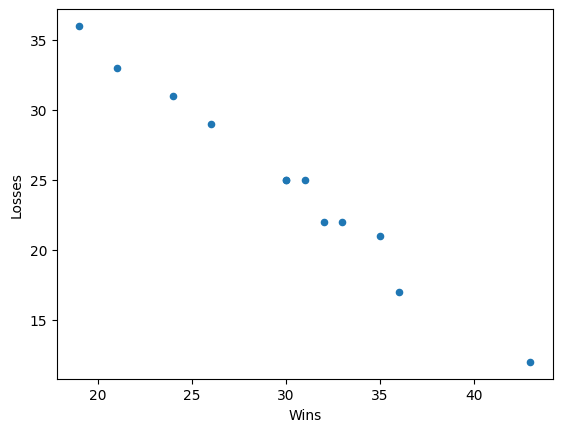

In [ ]:
nba.plot(kind="scatter", x="Wins", y="Losses")
plt.show()

# Tensorflow


In [ ]:
nba_train = pd.read_csv('/kaggle/input/nbawest/WestWins.csv', )
nba_train.head()

,Team,Wins,Losses,Pct
0,Celtics,43,12,0.782
1,Cavaliers,36,17,0.679
2,Bucks,35,21,0.625
3,Knicks,33,22,0.600
4,76ers,32,22,0.593


In [ ]:
nba_features = nba_train.copy() 
nba_labels = nba_features.pop('Pct')
nba_team_names = nba_features.pop('Team')

In [ ]:
nba_features = np.array(nba_features)
nba_features

array([[43, 12],
       [36, 17],
       [35, 21],
       [33, 22],
       [32, 22],
       [31, 25],
       [30, 25],
       [30, 25],
       [26, 29],
       [24, 31],
       [21, 33],
       [19, 36]])

In [ ]:
nba_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])
nba_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
nba_model.fit(nba_features, nba_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 195.9264
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 171.7674
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 149.5188
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 129.1427
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 110.5939
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 93.8197
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 78.7598
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 65.3469
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 53.5067
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 43.1586


In [ ]:
normalize = layers.Normalization()

In [ ]:
normalize.adapt(nba_features)

In [ ]:
norm_nba_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_nba_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_nba_model.fit(nba_features, nba_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 575ms/step - loss: 0.3960
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3653
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.3371
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3115
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2883
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2676
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2493
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2333
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2195
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2075
